In [78]:
using Convex
using ECOS
using PyPlot

In [79]:
m = 200
n = 60

A = randn(m,n)
b = 3*randn(m,1)

x = Variable(n)

Variable of
size: (60, 1)
sign: NoSign()
vexity: AffineVexity()


ECOS 2.0.2 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -1.291e+00  +1e+03  9e-01  5e-02  1e+00  1e+01    ---    ---    1  1  - |  -  - 
 1  -2.797e-01  -4.584e-01  +3e+02  6e-01  9e-03  3e-01  2e+00  0.7933  9e-03   1  1  1 |  0  0
 2  +2.953e+01  +2.971e+01  +3e+02  2e-01  5e-03  7e-01  2e+00  0.2175  9e-01   2  2  3 |  0  0
 3  +7.279e+01  +7.337e+01  +3e+02  1e-01  3e-03  1e+00  2e+00  0.1833  8e-01   2  2  2 |  0  0
 4  +5.963e+01  +6.016e+01  +3e+02  1e-01  3e-03  1e+00  2e+00  0.0147  9e-01   2  2  2 |  0  0
 5  +2.664e+02  +2.695e+02  +2e+02  1e-01  2e-03  4e+00  1e+00  0.8237  6e-01   2  2  2 |  0  0
 6  +1.627e+02  +1.647e+02  +2e+02  4e-02  2e-03  3e+00  1e+00  0.0793  9e-01   2  2  2 |  0  0
 7  +2.985e+02  +3.010e+02  +9e+01  4e-02  1e-03  3e+00  8e-01  0.5391  1e-01   2  2  2 |  0  0
 8  +2.480e+02  +2.499e+02  +9e+01  3e-02  9e-

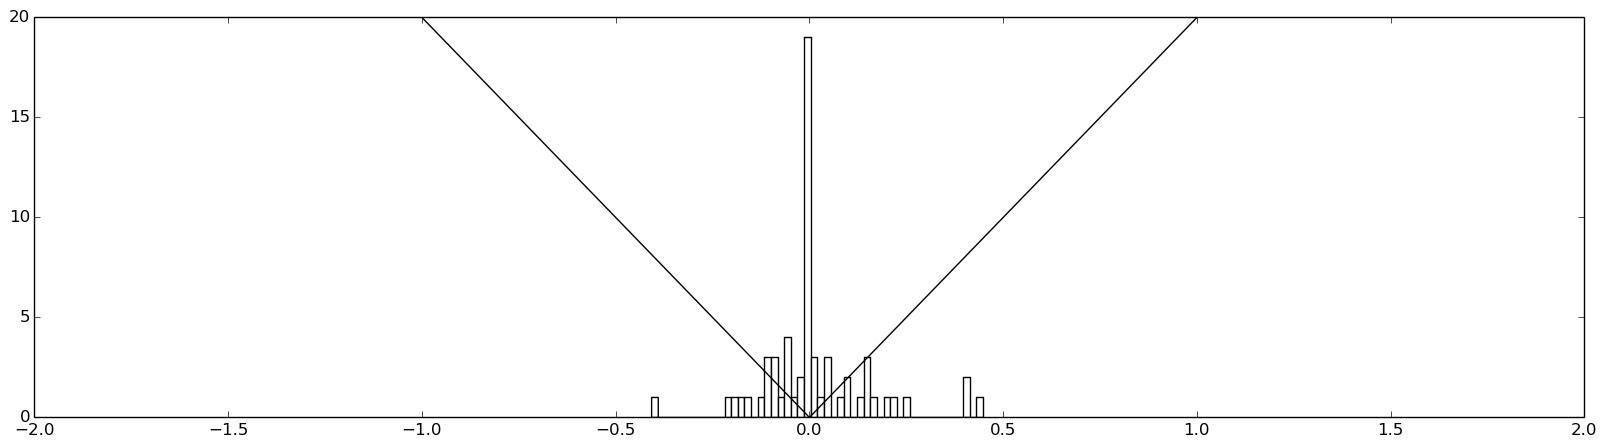

4-element Array{Int64,1}:
 -2
  2
  0
 20

In [80]:
#penalty weight
weight = 20

#objective function
obj = minimize(0.5*sum_squares(A*x - b) + weight*norm(x,1))

#use the solver
solve!(obj, ECOSSolver())

figure(figsize=(20,5))
r = -2:(0.1/50):2
plt[:hist](x.value,50,facecolor = "w")
plot(r, weight*max(-r,r), "k")
axis([-2,2,0,20])


ECOS 2.0.2 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -6.006e-16  -2.753e+00  +2e+01  5e-01  3e-02  1e+00  3e+00    ---    ---    1  1  - |  -  - 
 1  -3.572e-01  -6.785e-01  +3e+00  7e-02  3e-03  9e-02  4e-01  0.8704  3e-03   1  1  1 |  0  0
 2  +4.795e+01  +3.241e+01  +3e+00  1e+01  2e-01  2e+01  4e-01  0.3210  7e-01   2  2  2 |  0  0
 3  +3.062e+01  +4.461e+01  +5e-02  2e-01  4e-03  1e+01  8e-03  0.9853  5e-03   2  1  1 |  0  0
 4  +1.098e+02  +1.421e+02  +1e-02  1e-01  2e-03  3e+01  2e-03  0.8027  4e-02   3  2  2 |  0  0
 5  +1.464e+02  +2.026e+02  +6e-03  9e-02  2e-03  6e+01  9e-04  0.9890  5e-01   3  3  2 |  0  0
 6  +4.005e+02  +4.289e+02  +9e-04  2e-02  4e-04  3e+01  2e-04  0.9091  8e-02   4  3  3 |  0  0
 7  +4.943e+02  +5.148e+02  +4e-04  1e-02  3e-04  2e+01  6e-05  0.7131  2e-01   5  3  3 |  0  0
 8  +5.877e+02  +5.884e+02  +1e-05  3e-04  1e-

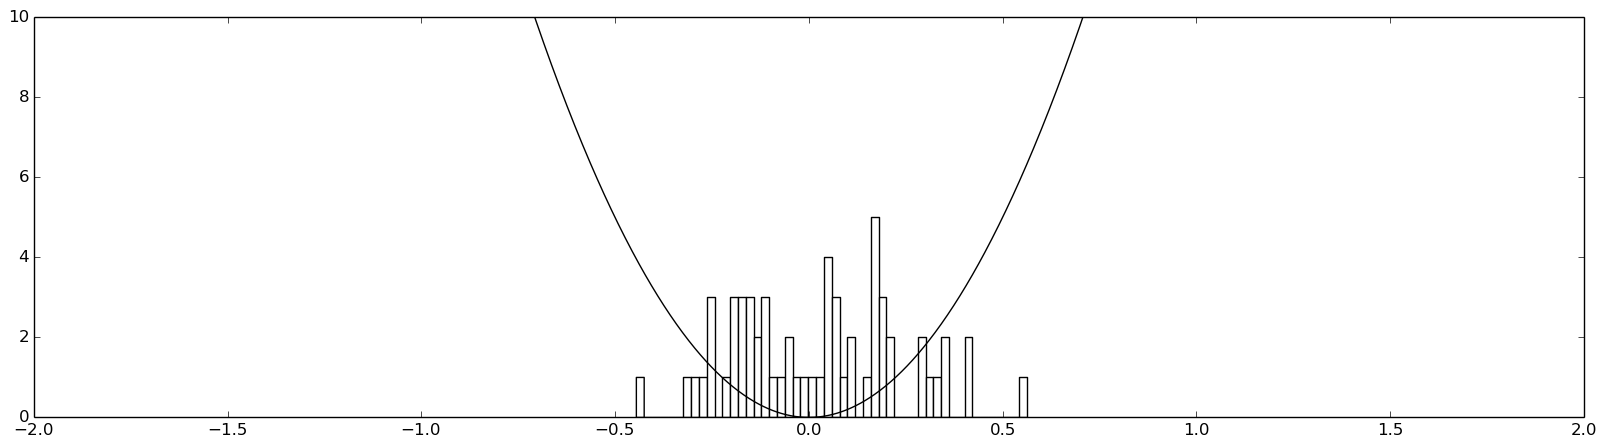

4-element Array{Int64,1}:
 -2
  2
  0
 10

In [81]:
#penalty weight
weight = 20

#objective function
obj = minimize(0.5*sum_squares(A*x - b) + weight*0.5*sum_squares(x))

#use the solver
solve!(obj, ECOSSolver())

figure(figsize=(20,5))
r = -2:(0.1/50):2
plt[:hist](x.value,50,facecolor = "w")
plot(r, weight*r.^2, "k")
axis([-2,2,0,10])


ECOS 2.0.2 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -1.860e+02  -2.663e+02  +2e+03  2e-01  1e-01  1e+00  6e+00    ---    ---    1  2  - |  -  - 
 1  -7.835e+01  -9.320e+01  +4e+02  7e-02  2e-02  3e-01  2e+00  0.7713  1e-02   2  1  1 |  0  0
 2  -6.821e+01  -8.466e+01  +4e+02  9e-02  1e-02  4e-01  1e+00  0.1687  9e-01   2  2  2 |  0  0
 3  -6.192e+01  -7.859e+01  +4e+02  1e-01  8e-03  6e-01  1e+00  0.1688  8e-01   2  2  2 |  0  0
 4  -5.312e+01  -7.014e+01  +3e+02  1e-01  7e-03  7e-01  1e+00  0.1992  8e-01   2  2  2 |  0  0
 5  -5.313e+01  -6.986e+01  +3e+02  1e-01  7e-03  7e-01  1e+00  0.0129  9e-01   2  2  1 |  0  0
 6  -2.729e+01  -4.514e+01  +3e+02  2e-01  4e-03  1e+00  1e+00  0.4824  7e-01   2  2  2 |  0  0
 7  -1.310e+01  -3.089e+01  +3e+02  2e-01  4e-03  1e+00  1e+00  0.2026  6e-01   2  2  2 |  0  0
 8  -1.867e+01  -3.462e+01  +3e+02  9e-02  4e-

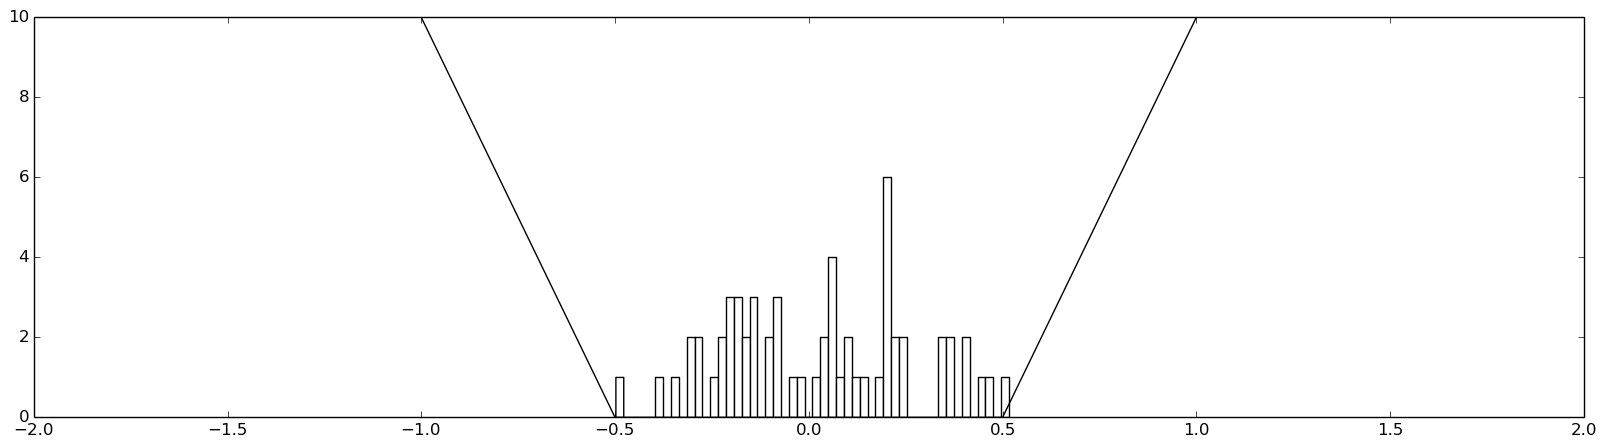

4-element Array{Int64,1}:
 -2
  2
  0
 10

In [82]:
#penalty weight
weight = 20

#objective function
obj = minimize(0.5*sum_squares(A*x - b) + weight*sum(max(x-0.5,0) + max(-x-0.5,0)))

#use the solver
solve!(obj, ECOSSolver())

figure(figsize=(20,5))
r = -2:(0.1/50):2
plt[:hist](x.value,50,facecolor = "w")
plot(r, weight*max(r-0.5,0,-r-0.5), "k")
axis([-2,2,0,10])


ECOS 2.0.2 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -2.670e+02  +4e+02  3e-01  6e-01  1e+00  1e+00    ---    ---    0  0  - |  -  - 
 1  +3.516e+01  -7.125e+01  +1e+02  8e-02  3e-01  4e-01  3e-01  0.7087  5e-02   2  1  1 |  1  1
 2  -6.976e+00  -5.733e+01  +6e+01  6e-02  1e-01  2e-01  2e-01  0.5722  1e-01   1  1  1 |  0  0
 3  +1.373e+01  -5.044e+01  +6e+01  8e-02  3e-02  3e-01  2e-01  0.0589  9e-01   2  2  2 |  0  0
 4  +1.575e+01  -4.404e+01  +5e+01  7e-02  2e-02  3e-01  2e-01  0.3725  6e-01   3  2  2 |  0  0
 5  +2.077e+01  -3.923e+01  +5e+01  7e-02  2e-02  4e-01  1e-01  0.1506  6e-01   2  2  2 |  0  0
 6  +1.861e+01  -3.937e+01  +5e+01  7e-02  2e-02  3e-01  1e-01  0.0188  9e-01   2  2  2 |  0  0
 7  +5.773e+01  +1.098e+00  +4e+01  5e-02  8e-03  4e-01  1e-01  0.7304  5e-01   2  2  2 |  0  0
 8  +4.870e+01  -5.545e-01  +4e+01  4e-02  7e-

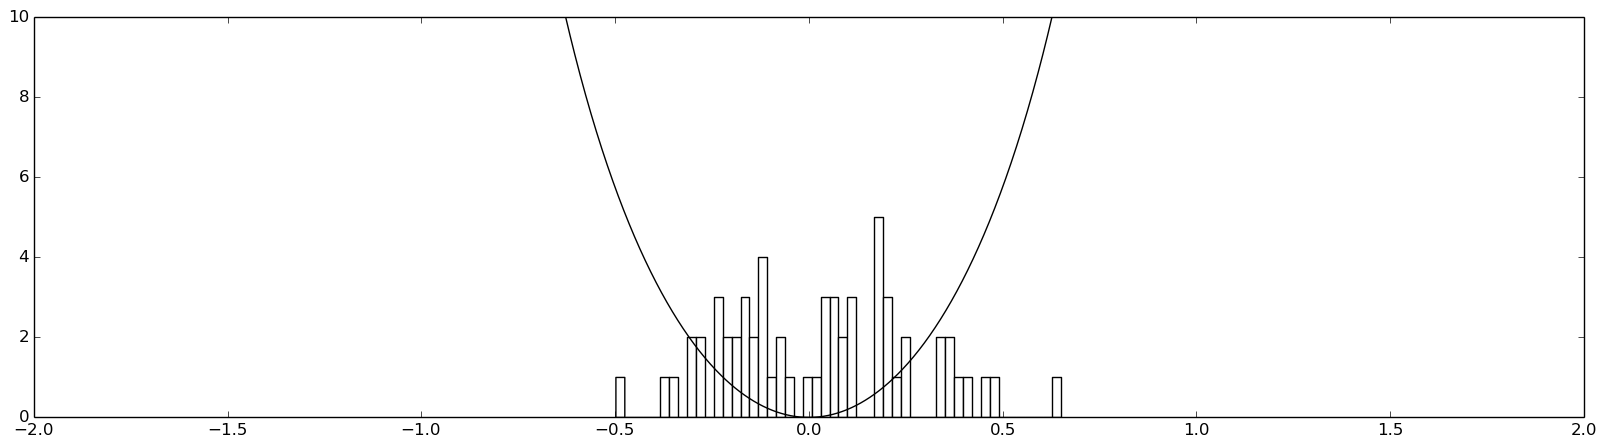

4-element Array{Int64,1}:
 -2
  2
  0
 10

In [83]:
#penalty weight
weight = 20

#objective function
obj = minimize(0.5*sum_squares(A*x - b) - sum(log(-x+1)) - sum(log(x+1)))

#use the solver
solve!(obj, ECOSSolver())

figure(figsize=(20,5))
r = -1:(0.1/50):1
plt[:hist](x.value,50,facecolor = "w")
plot(r, -weight*(log(-r+1)+log(r+1)), "k")
axis([-2,2,0,10])